<a href="https://colab.research.google.com/github/AlexXPZhu/XMUM-FYP-Code/blob/main/MergeFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 这个用来把三个文件融合，包括 sqlv1 sqlv2 和 modified data

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/FYP/sqliv2.csv'
sqli2 = pd.read_csv(file_path, encoding='utf-16')


display(sqli2.head(10))

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1
5,select * from users where id = '1' or @ @1 = ...,1
6,"select * from users where id = 1 or 1#"" ( un...",1
7,' select name from syscolumns where id = ( ...,1
8,select * from users where id = 1 +$+ or 1 = 1...,1
9,"1; ( load_file ( char ( 47,101,116,99,47,112,9...",1


In [3]:
sqli = pd.read_csv('/content/drive/MyDrive/FYP/sqli.csv', encoding='utf-16')
display(sqli.head(10))



,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
5,?,1
6,' and 1 = 0 ) union all,1
7,? or 1 = 1 --,1
8,x' and userid is NULL; --,1
9,x' and email is NULL; --,1


In [4]:
Modified = pd.read_csv('/content/drive/MyDrive/FYP/Modified_SQL_Dataset.csv')
display(Modified.head(10))



,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
6,select * from users where id = 1 +$+ or 1 =...,1
7,"1; ( load_file ( char ( 47,101,116,99,47...",1
8,select * from users where id = '1' or ||/1 ...,1
9,select * from users where id = '1' or \.<\ ...,1


In [5]:
merged = pd.concat([sqli, sqli2, Modified], ignore_index=True)
merged['Sentence'] = merged['Sentence'].fillna(merged['Query'])
merged.drop(columns=['Query'], inplace=True)
display(merged.head(10))
merged.info()

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
5,?,1
6,' and 1 = 0 ) union all,1
7,? or 1 = 1 --,1
8,x' and userid is NULL; --,1
9,x' and email is NULL; --,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68880 entries, 0 to 68879
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  68863 non-null  object
 1   Label     68880 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [6]:
# 对于融合后的数据进行去重，去除空内容
merged = merged.drop_duplicates(subset=['Sentence'])
merged = merged.dropna(subset=['Sentence'])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56897 entries, 0 to 68879
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  56897 non-null  object
 1   Label     56897 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
print("=== Class Distribution ===")
print(merged['Label'].value_counts())
print(merged['Label'].value_counts(normalize=True) * 100)

# 2. 输入长度统计
merged['length'] = merged['Sentence'].astype(str).str.len()
print("\n=== Input Length Statistics ===")
print(merged['length'].describe())
print(f"95th percentile: {merged['length'].quantile(0.95)}")


=== Class Distribution ===
Label
0    34633
1    22264
Name: count, dtype: int64
Label
0    60.869642
1    39.130358
Name: proportion, dtype: float64

=== Input Length Statistics ===
count    56897.000000
mean        65.022110
std         79.958885
min          1.000000
25%         14.000000
50%         42.000000
75%         83.000000
max       5370.000000
Name: length, dtype: float64
95th percentile: 223.0


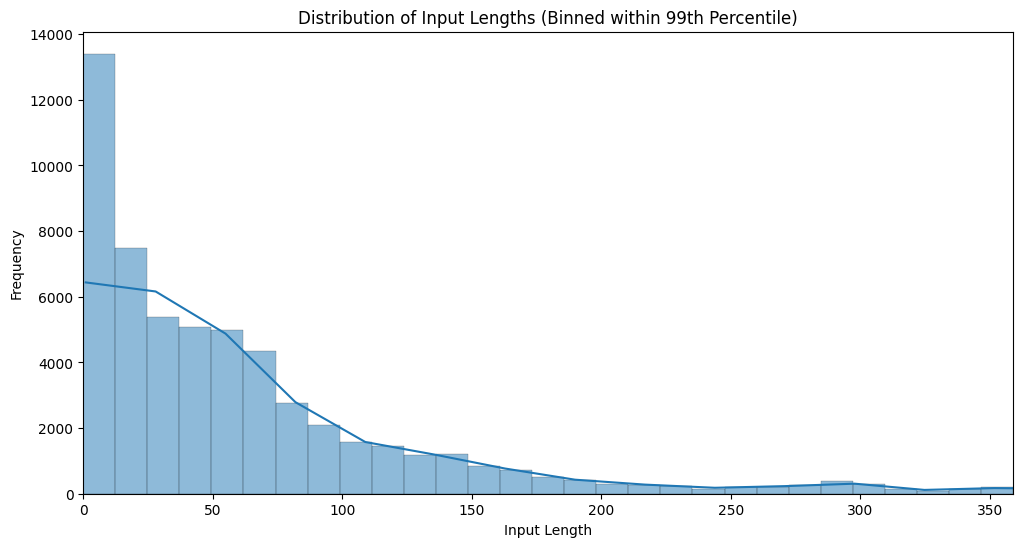

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))

# Calculate the 99th percentile
p99 = merged['length'].quantile(0.99)

# Create bins only up to the 99th percentile
bins_custom = np.linspace(0, p99, 30) # 100 bins between 0 and 99th percentile

sns.histplot(merged['length'], bins=bins_custom, kde=True)
plt.title('Distribution of Input Lengths (Binned within 99th Percentile)')
plt.xlabel('Input Length')
plt.ylabel('Frequency')

# Set x-axis limit to 99th percentile for clearer visualization
plt.xlim(0, p99)
plt.show()

In [ ]:
output_file_path = '/content/drive/MyDrive/FYP/merged_data.csv'
merged.to_csv(output_file_path, index=False)
print(f'Merged data saved to {output_file_path}')

Merged data saved to /content/drive/MyDrive/FYP/merged_data.csv
